### Group by

In [56]:
import numpy as np
import pandas as pd

In [57]:
table = pd.DataFrame(
{'first_column':['a','a','b','b','b', 'c'],
'second_column':[1,2,3,7,8,5],
'third_column':[20,10,33,22,21,11]})

In [58]:
table

,first_column,second_column,third_column
0,a,1,20
1,a,2,10
2,b,3,33
3,b,7,22
4,b,8,21
5,c,5,11


In [59]:
group_by_first_column = table.groupby('first_column')

In [60]:
for item in group_by_first_column:
    print(item[0])
    print(item[1])
    print("\n")

a
  first_column  second_column  third_column
0            a              1            20
1            a              2            10


b
  first_column  second_column  third_column
2            b              3            33
3            b              7            22
4            b              8            21


c
  first_column  second_column  third_column
5            c              5            11




In [61]:
group_by_first_column['second_column'].sum()

first_column
a     3
b    18
c     5
Name: second_column, dtype: int64

### 这两种方式有区别，涉及到列，就要用双中括号
#### 一个框 [ ] 是series
#### 两个框是 [ [ ] ] DataFrame

In [62]:
group_by_first_column[['second_column']].sum() 

,second_column
first_column,
a,3
b,18
c,5


In [63]:
group_by_first_column.mean()

,second_column,third_column
first_column,,
a,1.5,15.000000
b,6.0,25.333333
c,5.0,11.000000


### Show Frequency

In [64]:
table.groupby('first_column').size()

first_column
a    2
b    3
c    1
dtype: int64

In [65]:
table.describe() #Some Statistic Information

,second_column,third_column
count,6.000000,6.000000
mean,4.333333,19.500000
std,2.804758,8.408329
min,1.000000,10.000000
25%,2.250000,13.250000
50%,4.000000,20.500000
75%,6.500000,21.750000
max,8.000000,33.000000


In [66]:
table.info() #Some Basic Data Structure Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_column   6 non-null      object
 1   second_column  6 non-null      int64 
 2   third_column   6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes


### Give Information Devided BY Group

In [68]:
table.groupby('first_column').describe()

second_column                                            \
                     count mean       std  min   25%  50%   75%  max   
first_column                                                           
a                      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   
b                      3.0  6.0  2.645751  3.0  5.00  7.0  7.50  8.0   
c                      1.0  5.0       NaN  5.0  5.00  5.0  5.00  5.0   

             third_column                                                     
                    count       mean       std   min   25%   50%   75%   max  
first_column                                                                  
a                     2.0  15.000000  7.071068  10.0  12.5  15.0  17.5  20.0  
b                     3.0  25.333333  6.658328  21.0  21.5  22.0  27.5  33.0  
c                     1.0  11.000000       NaN  11.0  11.0  11.0  11.0  11.0

In [70]:
table.groupby('first_column').agg(['sum','mean'])

second_column      third_column           
                       sum mean          sum       mean
first_column                                           
a                        3  1.5           30  15.000000
b                       18  6.0           76  25.333333
c                        5  5.0           11  11.000000

In [75]:
type(table['first_column'])

pandas.core.series.Series

In [78]:
type(table[['first_column']])

pandas.core.frame.DataFrame

In [80]:
table['first_column']

0    a
1    a
2    b
3    b
4    b
5    c
Name: first_column, dtype: object

In [85]:
table[['first_column']]

,first_column
0,a
1,a
2,b
3,b
4,b
5,c


### 可以用numpy中的运算

In [89]:
table.groupby('first_column')[['third_column']].agg([np.sum,np.mean])

third_column           
                      sum       mean
first_column                        
a                      30  15.000000
b                      76  25.333333
c                      11  11.000000

### 与这种是一样的写法

In [90]:
table.groupby('first_column')[['third_column']].agg(['sum','mean'])

third_column           
                      sum       mean
first_column                        
a                      30  15.000000
b                      76  25.333333
c                      11  11.000000

#### 某一列有多少不同的取值

In [92]:
table['third_column'].unique()

array([20, 10, 33, 22, 21, 11])

#### 他们分别出现了多少次
#### value_counts和unique 只能对于一列数来操作，即只能对series，不能对dataframe操作

In [93]:
table['third_column'].value_counts() 

33    1
10    1
11    1
20    1
21    1
22    1
Name: third_column, dtype: int64

### 自定义标准化函数

In [94]:
def zscore(x):
    return (x-x.mean())/x.std() 

In [95]:
transformed = table.groupby('first_column').transform(zscore)

In [96]:
transformed

,second_column,third_column
0,-0.707107,0.707107
1,0.707107,-0.707107
2,-1.133893,1.151440
3,0.377964,-0.500626
4,0.755929,-0.650814
5,NaN,NaN


In [97]:
%matplotlib inline

In [98]:
compare_df = pd.DataFrame({'Origin':table['second_column'], 'Transformed':transformed['second_column']})

In [99]:
compare_df

,Origin,Transformed
0,1,-0.707107
1,2,0.707107
2,3,-1.133893
3,7,0.377964
4,8,0.755929
5,5,NaN


<AxesSubplot:>

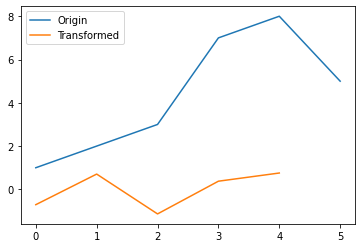

In [100]:
compare_df.plot()

### 变换函数apply

 #### 只要能把想做的‘操作’，写成函数，这个操作就可以用apply去实现

In [103]:
table.loc[:,'test_column'] = 3*table['second_column'] -5/2

In [104]:
table

,first_column,second_column,third_column,test_column
0,a,1,20,0.5
1,a,2,10,3.5
2,b,3,33,6.5
3,b,7,22,18.5
4,b,8,21,21.5
5,c,5,11,12.5


In [106]:
def test_func(x):
    return 3*x-5/2

In [109]:
table.loc[:,'apply_column'] = table['second_column'].apply(test_func)

In [110]:
table

,first_column,second_column,third_column,test_column,apply_column
0,a,1,20,0.5,0.5
1,a,2,10,3.5,3.5
2,b,3,33,6.5,6.5
3,b,7,22,18.5,18.5
4,b,8,21,21.5,21.5
5,c,5,11,12.5,12.5


### apply函数：指定一个列，对这个列，apply指定的函数去做变换

In [114]:
def second_test_func(x):
    if x==10:
        return '王茂安加油'
    else:
        return x

In [115]:
table.loc[:,'new_column'] = table['third_column'].apply(second_test_func)

In [116]:
table

,first_column,second_column,third_column,test_column,apply_column,new_column
0,a,1,20,0.5,0.5,20
1,a,2,10,3.5,3.5,王茂安加油
2,b,3,33,6.5,6.5,33
3,b,7,22,18.5,18.5,22
4,b,8,21,21.5,21.5,21
5,c,5,11,12.5,12.5,11


#### 也可以用lambda 匿名函数来完成操作

In [131]:
table.loc[:,'lambda_column'] = table['third_column'].apply(lambda x:'王茂安加油！' if x==10 else x)

### 对几列同时操作

In [123]:
def new_func(x,y,z):
    if x=='a':
        return y+z
    else:
        return y

In [129]:
table.loc[:,'map_column'] = list(map(lambda x,y,z:new_func(x,y,z),table['first_column'],
                                     table['second_column'],
                                     table['third_column']))

In [132]:
table

,first_column,second_column,third_column,test_column,apply_column,new_column,lambda_column,map_column
0,a,1,20,0.5,0.5,20,20,21
1,a,2,10,3.5,3.5,王茂安加油,王茂安加油！,12
2,b,3,33,6.5,6.5,33,33,3
3,b,7,22,18.5,18.5,22,22,7
4,b,8,21,21.5,21.5,21,21,8
5,c,5,11,12.5,12.5,11,11,5


## 总结

* groupby取分组内容
* groupby分组之后做统计计算agg(['sum',np.mean])
* groupby之后describe`transform
* apply对多列做变换（定义一个函数）
* 附加：对多列做变换，list(map(lambda x,y,z,a:my_fun(x,y,z,a),df['x'],,df['y']....))

# 数据的拼接与合并

* concat
* merge
* join

In [139]:
df1 = pd.DataFrame({
    '销量':[200,150], 'GMV':[1200,1390]}, index=['iphone', 'macbook']
)

In [160]:
df2 = pd.DataFrame({
    '销量':[400,212], 'GMV':[20003,1233]
},index=['sansung', 'huawei'])

In [166]:
df3 = pd.DataFrame({'销量':[20,10], 'GMV':[2344,1003]}, index=['xiaomi', 'oneplus'])

### CONCAT

In [162]:
#按行去拼接
result = pd.concat([df1,df1,df1], axis=1)

In [163]:
result

,销量,GMV,销量,GMV,销量,GMV
iphone,200,1200,200,1200,200,1200
macbook,150,1390,150,1390,150,1390


In [ ]:
#按列去拼接

In [164]:
result = pd.concat([df1,df2,df3], axis=0)

In [165]:
result

,销量,GMV
iphone,200,1200
macbook,150,1390
sansung,400,20003
huawei,212,1233
xiaomi,20,2344
oneplus,10,1003


### append

In [167]:
df1.append(df2)

,销量,GMV
iphone,200,1200
macbook,150,1390
sansung,400,20003
huawei,212,1233


### merge/合并

In [171]:
def my_trans_GMV(x):
    if x<15000:
        return 15000
    else:
        return 20000

In [174]:
result.loc[:,'new_GMV'] = result['GMV'].apply(my_trans_GMV)

In [175]:
result

,销量,GMV,new_GMV
iphone,200,1200,15000
macbook,150,1390,15000
sansung,400,20003,20000
huawei,212,1233,15000
xiaomi,20,2344,15000
oneplus,10,1003,15000


In [176]:
new_df = pd.DataFrame({'new_GMV':[15000,20000], 'bonus':[200000,1000]})

In [177]:
new_df

,new_GMV,bonus
0,15000,200000
1,20000,1000


In [178]:
pd.merge(result, new_df, on=['new_GMV'], how='inner')

,销量,GMV,new_GMV,bonus
0,200,1200,15000,200000
1,150,1390,15000,200000
2,212,1233,15000,200000
3,20,2344,15000,200000
4,10,1003,15000,200000
5,400,20003,20000,1000


### join ------基于index

In [180]:
df1

,销量,GMV
iphone,200,1200
macbook,150,1390


In [181]:
df2

,销量,GMV
sansung,400,20003
huawei,212,1233


In [182]:
df3

,销量,GMV
xiaomi,20,2344
oneplus,10,1003


In [183]:
df4 = pd.DataFrame({'销量':[10,20], 'GMV':[2000,3000]},index = ['xiaomi', 'oneplus'])

In [184]:
df4

,销量,GMV
xiaomi,10,2000
oneplus,20,3000


In [187]:
df4.join(df3, lsuffix='_caller', rsuffix='_other') ###避免列名重复

,销量_caller,GMV_caller,销量_other,GMV_other
xiaomi,10,2000,20,2344
oneplus,20,3000,10,1003


In [191]:
#若列名没有重复，可直接join
df5 = pd.DataFrame(
{'arpu':[200,150]}, index = ['xiaomi', 'oneplus'])

In [192]:
df4.join(df5)

,销量,GMV,arpu
xiaomi,10,2000,200
oneplus,20,3000,150


### 总结
* concat: 拼接，按axis指定拼接方式。axis=0是上下拼接， axis=1是左右拼接
* merge：基于某个列做关联，类似SQL
* join：基于index做合并